In [12]:
import random as rnd

import numpy as np
from scipy import fft

import matplotlib.pyplot as plt


%matplotlib inline

Number 1 <br>
Work with fft and simple signals spectr

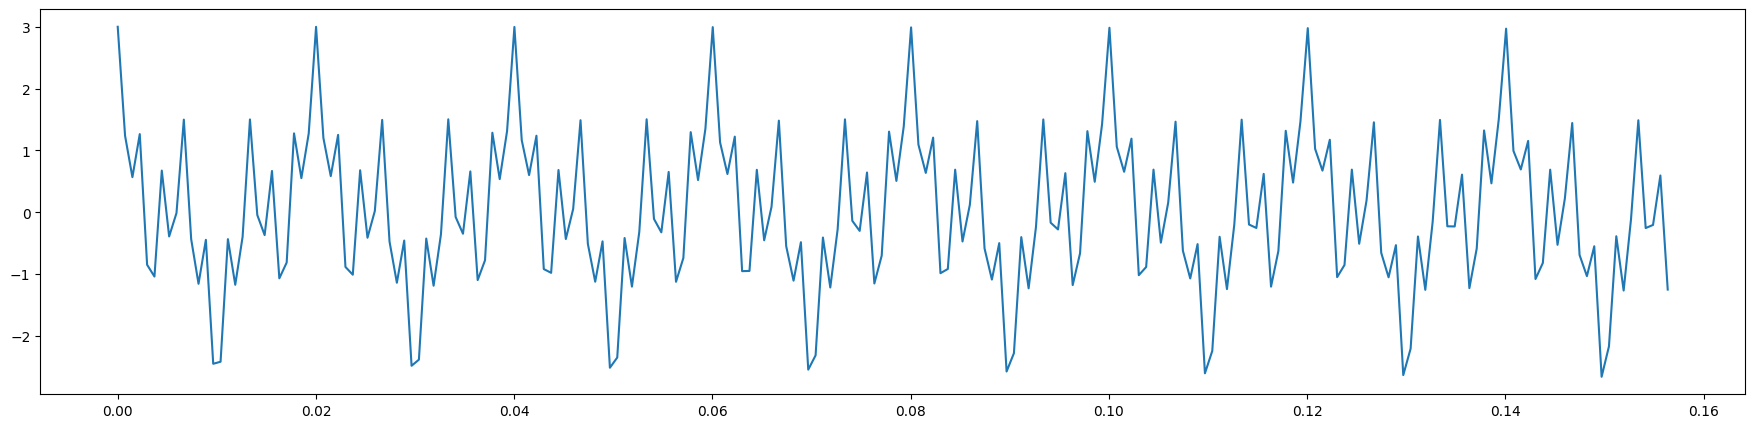

In [13]:
# Cos of signals with frequncy 50/150/450 Gz

def f_cos(x: np.array, freq: float, A=1.0):
    return A * np.cos(2 * np.pi * freq * x)

freq_1 = 50
freq_2 = 150
freq_3 = 450
fmax = freq_3 * 3
T = 1 / fmax
N = 1700

x = np.linspace(0, N * T, num=N, endpoint=True)
y = f_cos(x, freq_1) + f_cos(x, freq_2) + f_cos(x, freq_3)

plt.figure(figsize=(22, 5))
plt.plot(x[0:N//8], y[0:N//8])
plt.show()

Furie transform and spectr of signals

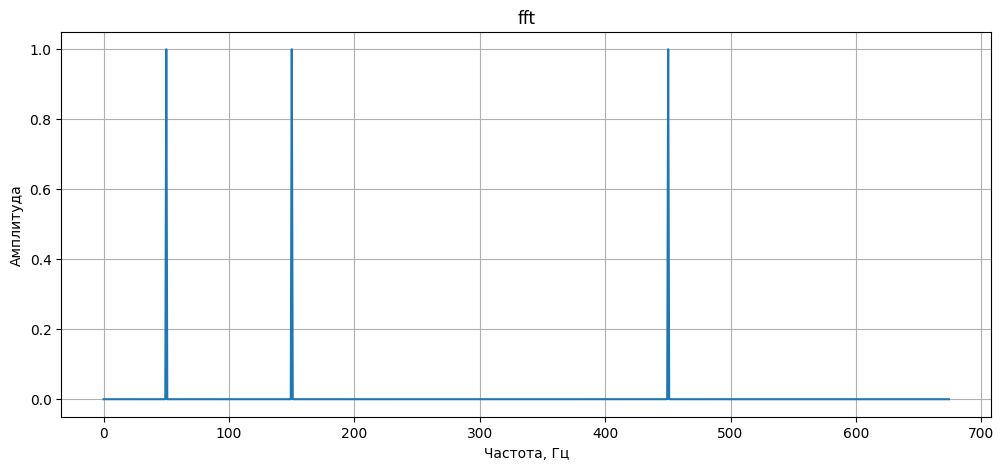

In [14]:
# FFT functions
yff = fft.fft(y)
yf = abs(yff[:N//2])
xff = fft.fftfreq(N, T)
xf = xff[:N//2]

# Spectr of the signal

plt.figure(figsize=(12, 5))

plt.plot(xf, yf * 2 / N)
plt.title("fft")
plt.xlabel("Частота, Гц")
plt.ylabel("Амплитуда")
plt.grid()

plt.show()


Number 2<br>
Add Butterwort's filter of low frequncyes


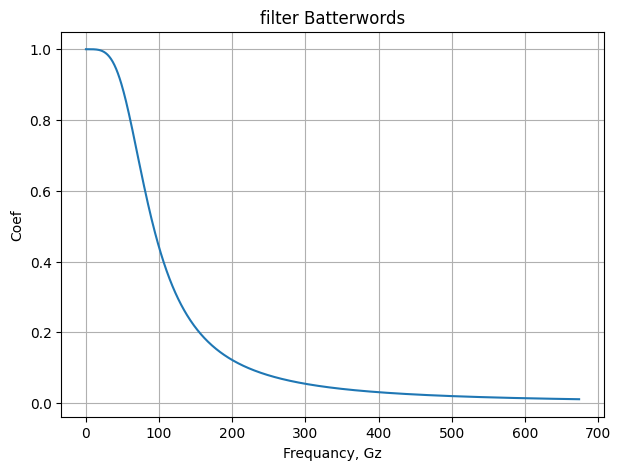

In [15]:
def low_pass_filter(freq, freq_c):
    return (freq_c ** 2) / (-freq**2 + np.sqrt(2) * freq_c * freq * 1j + freq_c ** 2)

freq_filter = abs(low_pass_filter(xff, 70))

plt.figure(figsize=(7, 5))

plt.plot(xf, freq_filter[:N//2])
plt.title("filter Batterwords")
plt.xlabel("Frequancy, Gz")
plt.ylabel("Coef")
plt.grid()

plt.show()

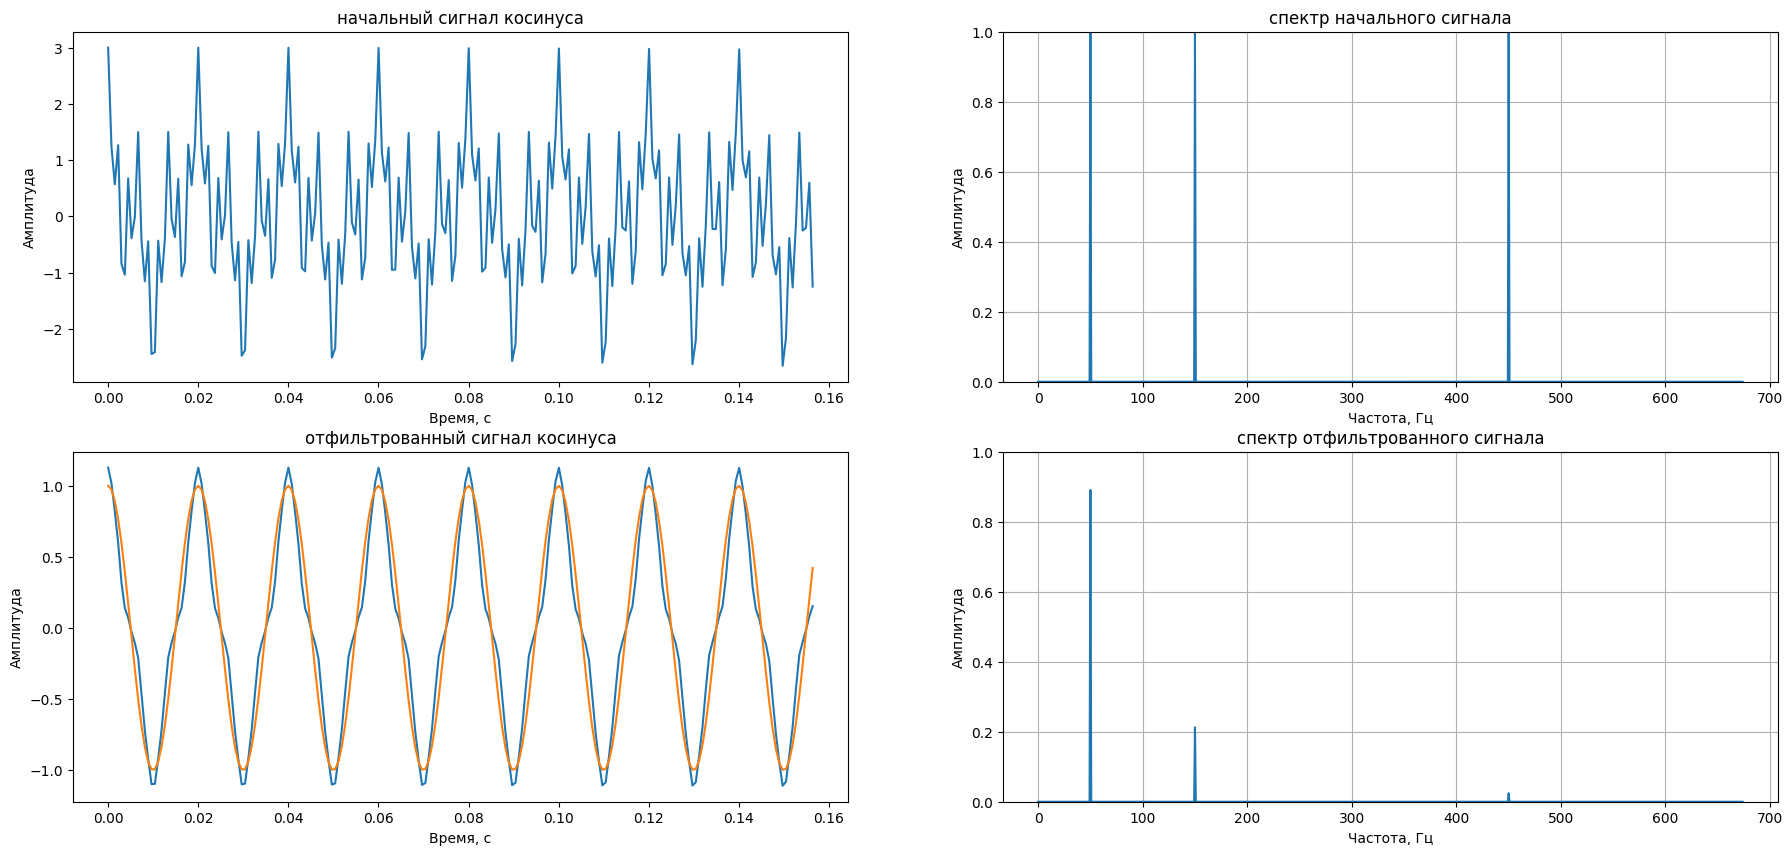

In [16]:
y_filtered = freq_filter * yff
yif = fft.ifft(y_filtered)

fig, axes = plt.subplots(2, 2, figsize=(22, 10))

y_spectrums = [yff, y_filtered]
y_func = [y, yif]
label_spectrum = ["спектр начального сигнала", "спектр отфильтрованного сигнала"]
label_signal = ["начальный сигнал косинуса", "отфильтрованный сигнал косинуса"]
for i, ax_row in enumerate(axes):
    ax_row[0].plot(x[:N//8], y_func[i][:N//8])
    if i == 1: ax_row[0].plot(x[:N//8], f_cos(x, freq_1)[:N//8])
    ax_row[0].set_title(label_signal[i])
    ax_row[0].set_xlabel("Время, с")
    ax_row[0].set_ylabel("Амплитуда")

    ax_row[1].plot(xf, y_spectrums[i][:N//2] * 2 / N)
    ax_row[1].set_title(label_spectrum[i])
    ax_row[1].set_xlabel("Частота, Гц")
    ax_row[1].set_ylabel("Амплитуда")
    ax_row[1].set_ylim(0, 1)
    ax_row[1].grid()

plt.show()

Number 3

Another filter


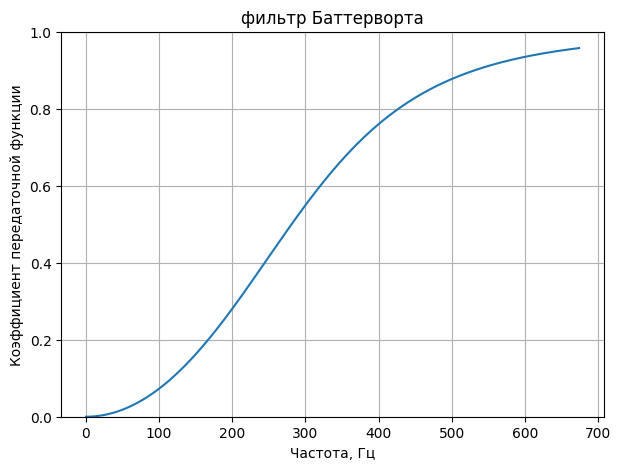

In [17]:
def high_pass_filter(freq, freq_c):
    return (freq ** 2) / (-freq_c**2 + np.sqrt(2) * freq_c * freq * 1j + freq ** 2)

freq_filter = abs(high_pass_filter(xff, 370))

plt.figure(figsize=(7, 5))

plt.plot(xf, freq_filter[:N//2])
plt.title("фильтр Баттерворта")
plt.xlabel("Частота, Гц")
plt.ylabel("Коэффициент передаточной функции")
plt.ylim(0, 1)
plt.grid()

plt.show()

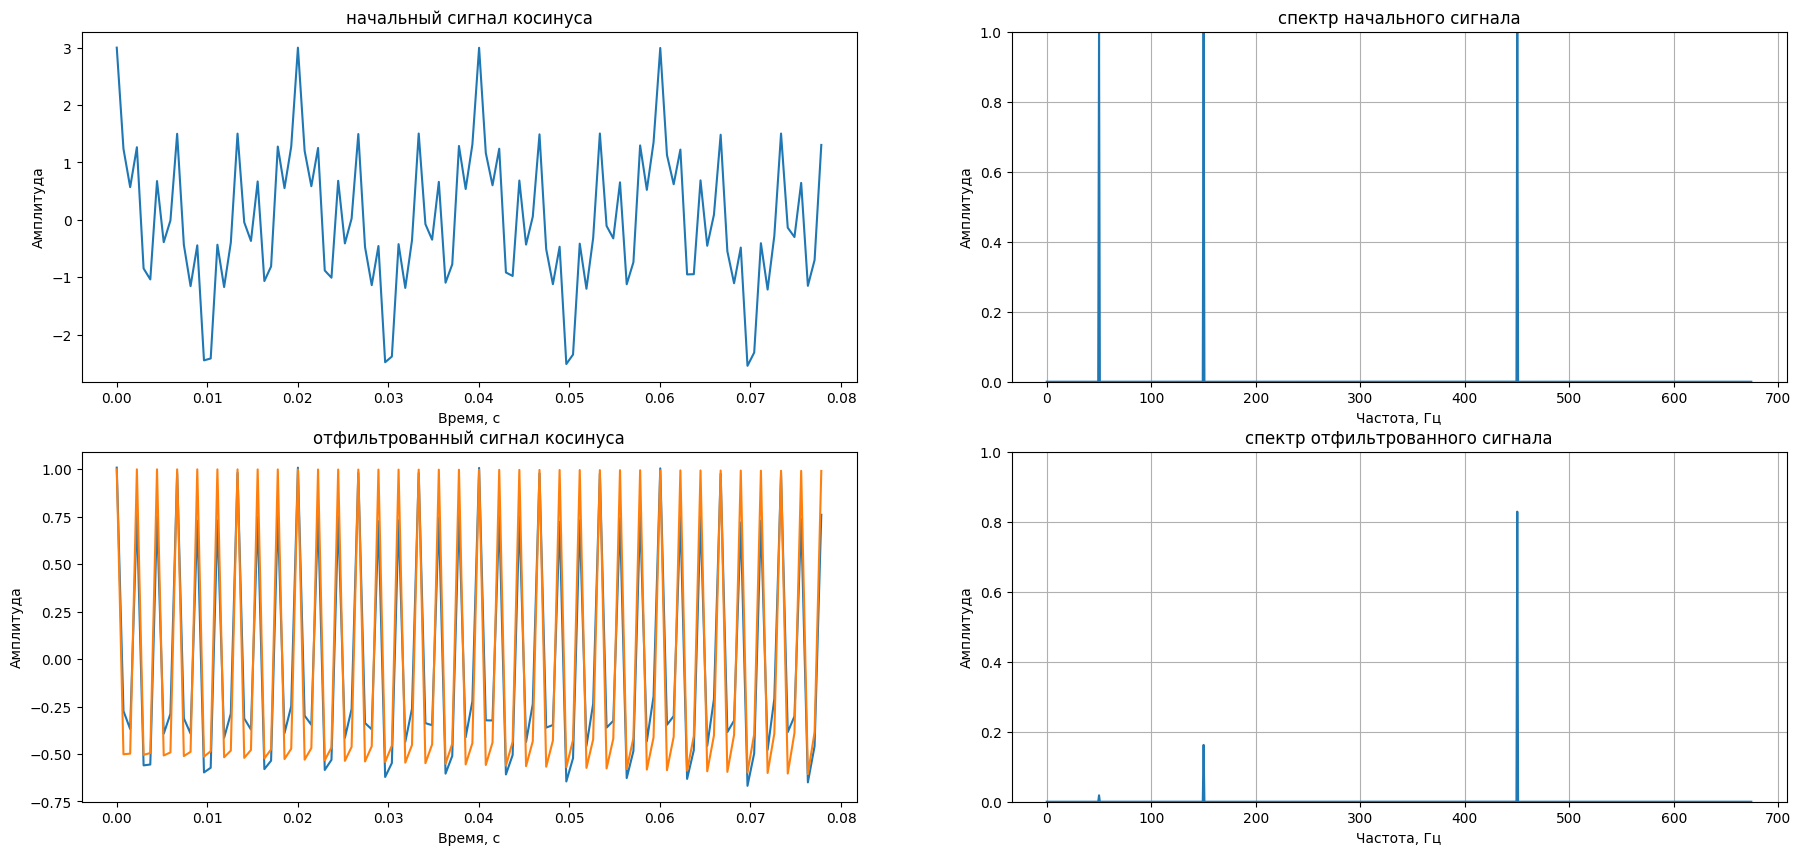

In [18]:
# Signals filter 
y_filtered = freq_filter * yff
yif = fft.ifft(y_filtered)

fig, axes = plt.subplots(2, 2, figsize=(22, 10))

y_spectrums = [yff, y_filtered]
y_func = [y, yif]
label_spectrum = ["спектр начального сигнала", "спектр отфильтрованного сигнала"]
label_signal = ["начальный сигнал косинуса", "отфильтрованный сигнал косинуса"]
for i, ax_row in enumerate(axes):
    ax_row[0].plot(x[:N//16], y_func[i][:N//16])
    if i == 1: ax_row[0].plot(x[:N//16], f_cos(x, freq_3)[:N//16])
    ax_row[0].set_title(label_signal[i])
    ax_row[0].set_xlabel("Время, с")
    ax_row[0].set_ylabel("Амплитуда")

    ax_row[1].plot(xf, y_spectrums[i][:N//2] * 2 / N)
    ax_row[1].set_title(label_spectrum[i])
    ax_row[1].set_xlabel("Частота, Гц")
    ax_row[1].set_ylabel("Амплитуда")
    ax_row[1].set_ylim(0, 1)
    ax_row[1].grid()

plt.show()

Another filter

Strict filter

Number 4


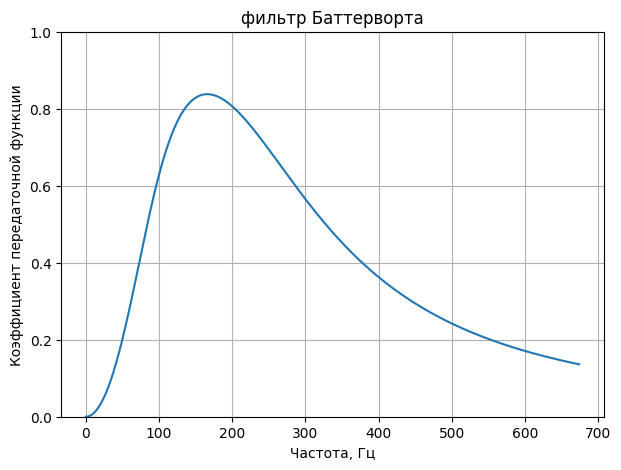

In [20]:
def bandpass_filter(freq, freq_l, freq_r):
    return low_pass_filter(freq, freq_r) * high_pass_filter(freq, freq_l)

freq_filter = abs(bandpass_filter(xff, 110, 250))

plt.figure(figsize=(7, 5))

plt.plot(xf, freq_filter[:N//2])
plt.title("фильтр Баттерворта")
plt.xlabel("Частота, Гц")
plt.ylabel("Коэффициент передаточной функции")
plt.ylim(0, 1)
plt.grid()

plt.show()

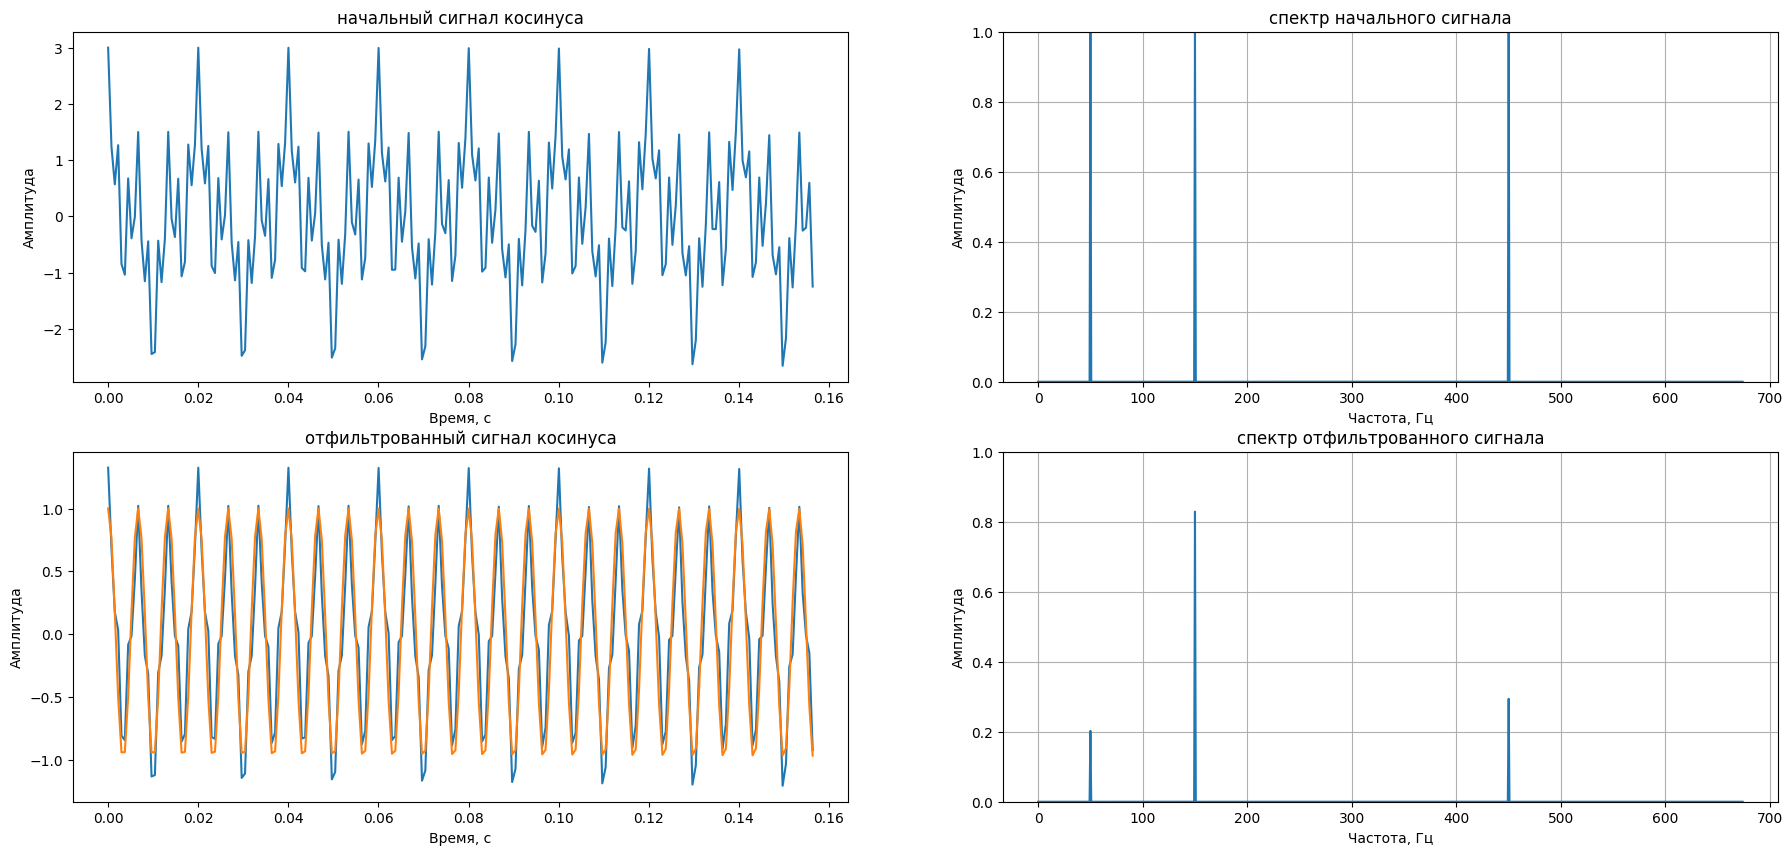

In [21]:
y_filtered = freq_filter * yff
yif = fft.ifft(y_filtered)

fig, axes = plt.subplots(2, 2, figsize=(22, 10))

y_spectrums = [yff, y_filtered]
y_func = [y, yif]
label_spectrum = ["спектр начального сигнала", "спектр отфильтрованного сигнала"]
label_signal = ["начальный сигнал косинуса", "отфильтрованный сигнал косинуса"]
for i, ax_row in enumerate(axes):
    ax_row[0].plot(x[:N//8], y_func[i][:N//8])
    if i == 1: ax_row[0].plot(x[:N//8], f_cos(x, freq_2)[:N//8])
    ax_row[0].set_title(label_signal[i])
    ax_row[0].set_xlabel("Время, с")
    ax_row[0].set_ylabel("Амплитуда")

    ax_row[1].plot(xf, y_spectrums[i][:N//2] * 2 / N)
    ax_row[1].set_title(label_spectrum[i])
    ax_row[1].set_xlabel("Частота, Гц")
    ax_row[1].set_ylabel("Амплитуда")
    ax_row[1].set_ylim(0, 1)
    ax_row[1].grid()

plt.show()

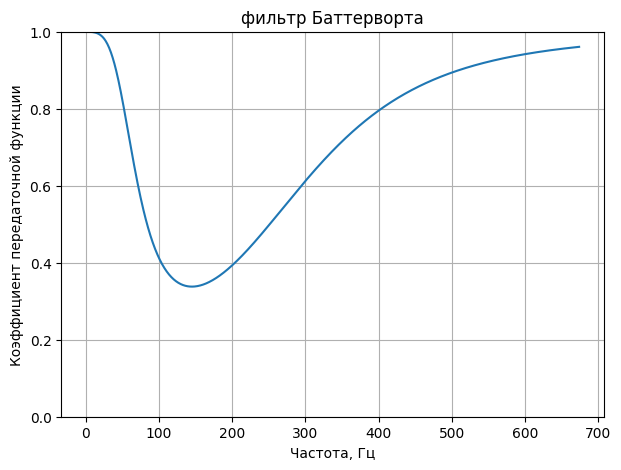

In [23]:
def blocking_filter(freq, freq_l, freq_r):
    return low_pass_filter(freq, freq_l) + high_pass_filter(freq, freq_r)

freq_filter = abs(blocking_filter(xff, 60, 350))

plt.figure(figsize=(7, 5))

plt.plot(xf, freq_filter[:N//2])
plt.title("фильтр Баттерворта")
plt.xlabel("Частота, Гц")
plt.ylabel("Коэффициент передаточной функции")
plt.ylim(0, 1)
plt.grid()

plt.show()

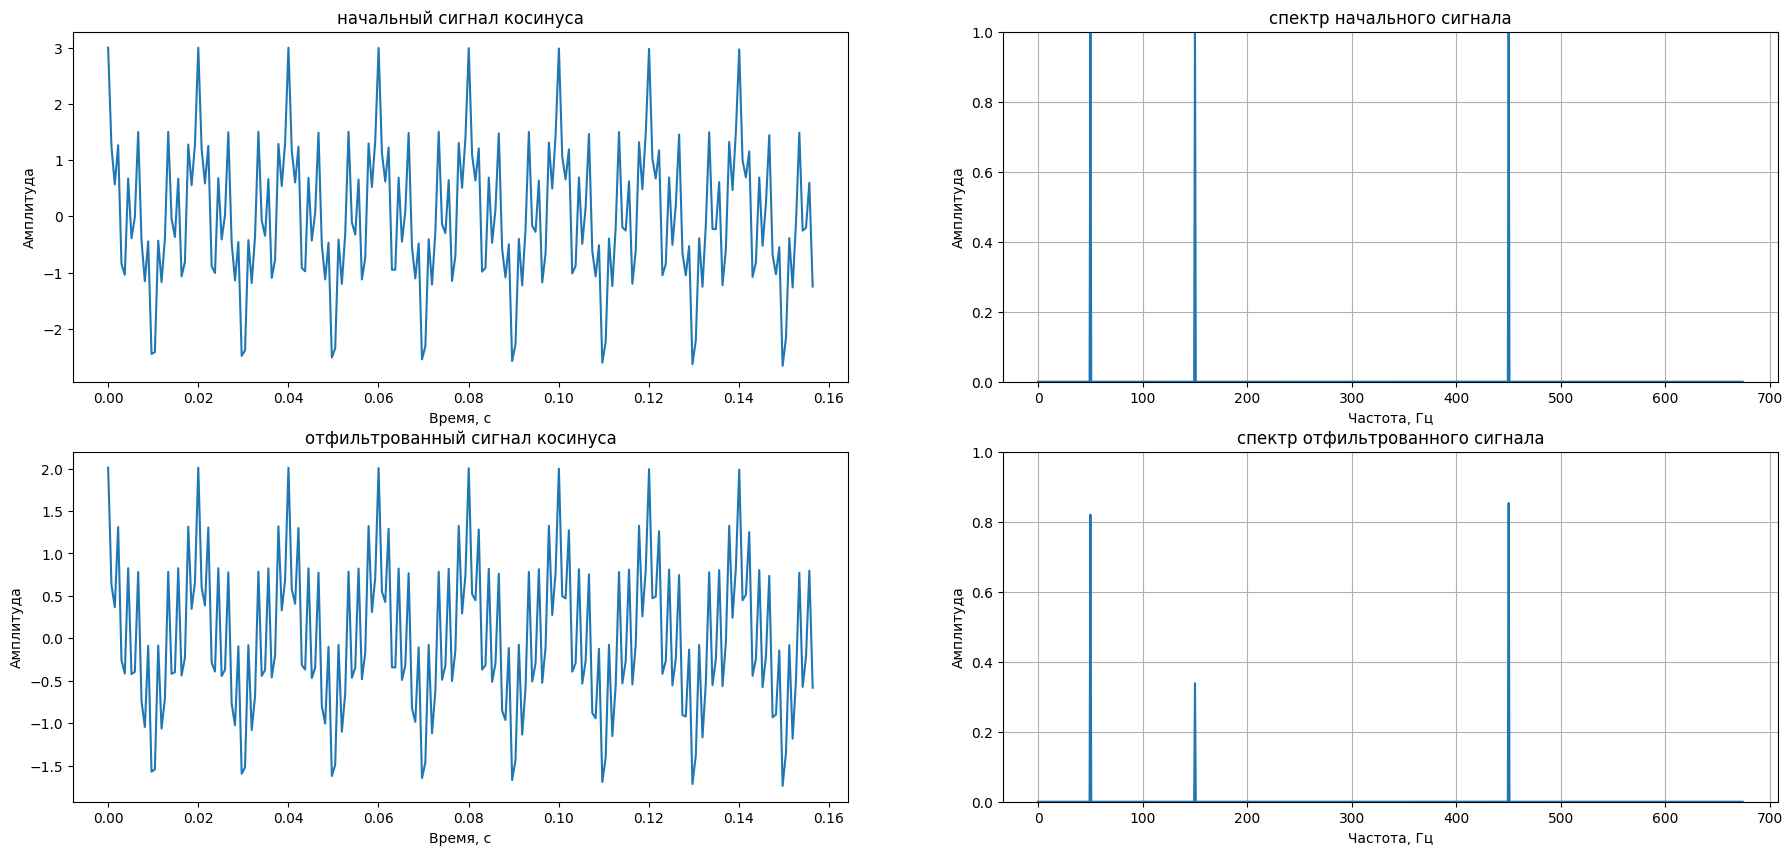

In [24]:
y_filtered = freq_filter * yff
yif = fft.ifft(y_filtered)

fig, axes = plt.subplots(2, 2, figsize=(22, 10))

y_spectrums = [yff, y_filtered]
y_func = [y, yif]
label_spectrum = ["спектр начального сигнала", "спектр отфильтрованного сигнала"]
label_signal = ["начальный сигнал косинуса", "отфильтрованный сигнал косинуса"]
for i, ax_row in enumerate(axes):
    ax_row[0].plot(x[:N//8], y_func[i][:N//8])
    ax_row[0].set_title(label_signal[i])
    ax_row[0].set_xlabel("Время, с")
    ax_row[0].set_ylabel("Амплитуда")

    ax_row[1].plot(xf, y_spectrums[i][:N//2] * 2 / N)
    ax_row[1].set_title(label_spectrum[i])
    ax_row[1].set_xlabel("Частота, Гц")
    ax_row[1].set_ylabel("Амплитуда")
    ax_row[1].set_ylim(0, 1)
    ax_row[1].grid()

plt.show()

Number 5